<a href="https://colab.research.google.com/github/FarooqBaig/Automatic-Attendance-Collecting-System/blob/main/NewFerrrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [4]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [5]:
#! gdown --id 1PfeXBYOGdwXehjx-xKj90DO1cG7tSMt-

In [6]:
!unzip 'CK.zip'

Archive:  CK.zip
   creating: CK/
   creating: CK/test/
   creating: CK/test/anger/
  inflating: CK/test/anger/S502_001_00000015.png  
  inflating: CK/test/anger/S502_001_00000016.png  
  inflating: CK/test/anger/S503_001_00000069.png  
  inflating: CK/test/anger/S503_001_00000070.png  
  inflating: CK/test/anger/S503_001_00000071.png  
  inflating: CK/test/anger/S504_001_00000020.png  
  inflating: CK/test/anger/S504_001_00000021.png  
  inflating: CK/test/anger/S504_001_00000022.png  
  inflating: CK/test/anger/S506_001_00000038.png  
  inflating: CK/test/anger/S506_001_00000039.png  
  inflating: CK/test/anger/S506_001_00000040.png  
  inflating: CK/test/anger/S999_001_00000016.png  
  inflating: CK/test/anger/S999_001_00000017.png  
  inflating: CK/test/anger/S999_001_00000018.png  
   creating: CK/test/contempt/
  inflating: CK/test/contempt/S504_002_00000009.png  
  inflating: CK/test/contempt/S505_002_00000019.png  
  inflating: CK/test/contempt/S505_002_00000020.png  
  inflati

In [7]:
picture_size = 48
folder_path = "CK/"

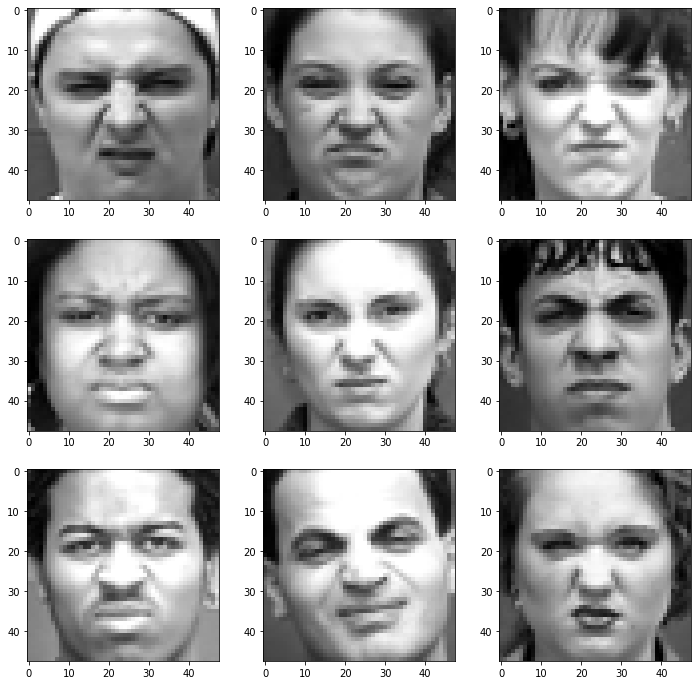

In [8]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [9]:
batch_size=64
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 981 images belonging to 7 classes.
Found 179 images belonging to 7 classes.


In [10]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(128,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(128,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#5th CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#6th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=12,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=12,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                

Epoch 1/48
14/15 [===========================>..] - ETA: 0s - loss: 1.9600 - accuracy: 0.2802

15/15 [==============================] - 12s 148ms/step - loss: 1.9178 - accuracy: 0.2923 - val_loss: 8.2119 - val_accuracy: 0.0156 - lr: 0.0010
Epoch 2/48
15/15 [==============================] - ETA: 0s - loss: 1.4067 - accuracy: 0.5278

15/15 [==============================] - 1s 53ms/step - loss: 1.4067 - accuracy: 0.5278 - val_loss: 4.6643 - val_accuracy: 0.2109 - lr: 0.0010
Epoch 3/48
15/15 [==============================] - ETA: 0s - loss: 0.9852 - accuracy: 0.6390

15/15 [==============================] - 1s 48ms/step - loss: 0.9852 - accuracy: 0.6390 - val_loss: 1.6377 - val_accuracy: 0.4922 - lr: 0.0010
Epoch 4/48
15/15 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.7492

15/15 [==============================] - 1s 48ms/step - loss: 0.6913 - accuracy: 0.7492 - val_loss: 1.9266 - val_accuracy: 0.3594 - lr: 0.0010
Epoch 5/48
15/15 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.8255

15/15 [==============================] - 1s 47ms/step - loss: 0.4989 - accuracy: 0.8255 - val_loss: 2.7083 - val_accuracy: 0.3047 - lr: 0.0010
Epoch 6/48
15/15 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.8506

15/15 [==============================] - 1s 47ms/step - loss: 0.3964 - accuracy: 0.8506 - val_loss: 1.9578 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 7/48
14/15 [===========================>..] - ETA: 0s - loss: 0.3144 - accuracy: 0.8957

15/15 [==============================] - 1s 50ms/step - loss: 0.3182 - accuracy: 0.8942 - val_loss: 1.4403 - val_accuracy: 0.5859 - lr: 0.0010
Epoch 8/48
15/15 [==============================] - ETA: 0s - loss: 0.2980 - accuracy: 0.8942

15/15 [==============================] - 1s 49ms/step - loss: 0.2980 - accuracy: 0.8942 - val_loss: 1.2853 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 9/48
15/15 [==============================] - ETA: 0s - loss: 0.2383 - accuracy: 0.9204

15/15 [==============================] - 1s 48ms/step - loss: 0.2383 - accuracy: 0.9204 - val_loss: 1.6719 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 10/48
15/15 [==============================] - ETA: 0s - loss: 0.1754 - accuracy: 0.9498

15/15 [==============================] - 1s 49ms/step - loss: 0.1754 - accuracy: 0.9498 - val_loss: 0.5964 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 11/48
15/15 [==============================] - ETA: 0s - loss: 0.1191 - accuracy: 0.9662

15/15 [==============================] - 1s 48ms/step - loss: 0.1191 - accuracy: 0.9662 - val_loss: 0.6477 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 12/48
14/15 [===========================>..] - ETA: 0s - loss: 0.1086 - accuracy: 0.9660

15/15 [==============================] - 1s 48ms/step - loss: 0.1127 - accuracy: 0.9629 - val_loss: 0.9635 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 13/48
15/15 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9815

15/15 [==============================] - 1s 56ms/step - loss: 0.0878 - accuracy: 0.9815 - val_loss: 1.6008 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 14/48
15/15 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9629

15/15 [==============================] - 1s 57ms/step - loss: 0.0990 - accuracy: 0.9629 - val_loss: 0.9772 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 15/48
15/15 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9695

15/15 [==============================] - 1s 49ms/step - loss: 0.0800 - accuracy: 0.9695 - val_loss: 0.4044 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 16/48
15/15 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9738

15/15 [==============================] - 1s 48ms/step - loss: 0.0720 - accuracy: 0.9738 - val_loss: 0.7407 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 17/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0711 - accuracy: 0.9789

15/15 [==============================] - 1s 50ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 0.3117 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 18/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0672 - accuracy: 0.9824

15/15 [==============================] - 1s 48ms/step - loss: 0.0728 - accuracy: 0.9815 - val_loss: 0.4430 - val_accuracy: 0.8828 - lr: 0.0010
Epoch 19/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0680 - accuracy: 0.9730

15/15 [==============================] - 1s 52ms/step - loss: 0.0661 - accuracy: 0.9738 - val_loss: 0.2183 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 20/48
15/15 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9760

15/15 [==============================] - 1s 50ms/step - loss: 0.0612 - accuracy: 0.9760 - val_loss: 0.8208 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 21/48
15/15 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9891

15/15 [==============================] - 1s 48ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.3571 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 22/48
15/15 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9869

15/15 [==============================] - 1s 48ms/step - loss: 0.0315 - accuracy: 0.9869 - val_loss: 0.5650 - val_accuracy: 0.8516 - lr: 0.0010
Epoch 23/48
15/15 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9902

15/15 [==============================] - 1s 50ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.2435 - val_accuracy: 0.9531 - lr: 0.0010
Epoch 24/48
15/15 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9945

15/15 [==============================] - 1s 49ms/step - loss: 0.0237 - accuracy: 0.9945 - val_loss: 0.1845 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 25/48
15/15 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9847

15/15 [==============================] - 1s 48ms/step - loss: 0.0521 - accuracy: 0.9847 - val_loss: 0.2277 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 26/48
15/15 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9956

15/15 [==============================] - 1s 50ms/step - loss: 0.0255 - accuracy: 0.9956 - val_loss: 0.1034 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 27/48
15/15 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9891

15/15 [==============================] - 1s 49ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.1532 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 28/48
15/15 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9869

15/15 [==============================] - 1s 48ms/step - loss: 0.0469 - accuracy: 0.9869 - val_loss: 0.1479 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 29/48
15/15 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9948

15/15 [==============================] - 1s 49ms/step - loss: 0.0233 - accuracy: 0.9948 - val_loss: 0.1214 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 30/48
15/15 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9945

15/15 [==============================] - 1s 48ms/step - loss: 0.0252 - accuracy: 0.9945 - val_loss: 0.1586 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 31/48
15/15 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9891

15/15 [==============================] - 1s 50ms/step - loss: 0.0305 - accuracy: 0.9891 - val_loss: 0.1682 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 32/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0120 - accuracy: 0.9988

15/15 [==============================] - 1s 49ms/step - loss: 0.0122 - accuracy: 0.9989 - val_loss: 0.1553 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 33/48
15/15 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9924

15/15 [==============================] - 1s 48ms/step - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.1050 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 34/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0354 - accuracy: 0.9894

15/15 [==============================] - 1s 49ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.6681 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 35/48
15/15 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9891

15/15 [==============================] - 1s 50ms/step - loss: 0.0291 - accuracy: 0.9891 - val_loss: 0.1027 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 36/48
15/15 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9913

15/15 [==============================] - 1s 49ms/step - loss: 0.0226 - accuracy: 0.9913 - val_loss: 0.1469 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 37/48
15/15 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9924

15/15 [==============================] - 1s 49ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.1605 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 38/48
15/15 [==============================] - ETA: 0s - loss: 0.0348 - accuracy: 0.9924

15/15 [==============================] - 1s 49ms/step - loss: 0.0348 - accuracy: 0.9924 - val_loss: 0.1403 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 39/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0263 - accuracy: 0.9918

15/15 [==============================] - 1s 49ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.1375 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 40/48
15/15 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9989

15/15 [==============================] - 1s 49ms/step - loss: 0.0109 - accuracy: 0.9989 - val_loss: 0.1488 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 41/48
15/15 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9924

15/15 [==============================] - 1s 48ms/step - loss: 0.0206 - accuracy: 0.9924 - val_loss: 0.1698 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 42/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9906

15/15 [==============================] - 1s 50ms/step - loss: 0.0241 - accuracy: 0.9913 - val_loss: 0.1506 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 43/48
15/15 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9913

15/15 [==============================] - 1s 49ms/step - loss: 0.0199 - accuracy: 0.9913 - val_loss: 0.2924 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 44/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0308 - accuracy: 0.9894

15/15 [==============================] - 1s 49ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.2759 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 45/48
14/15 [===========================>..] - ETA: 0s - loss: 0.0250 - accuracy: 0.9918

15/15 [==============================] - 1s 48ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.2989 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 46/48
15/15 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9880

15/15 [==============================] - 1s 48ms/step - loss: 0.0298 - accuracy: 0.9880 - val_loss: 0.2175 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 47/48
15/15 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9902Restoring model weights from the end of the best epoch: 35.



Epoch 47: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
15/15 [==============================] - 1s 51ms/step - loss: 0.0396 - accuracy: 0.9902 - val_loss: 0.1936 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 47: early stopping


In [13]:
model.save_weights('face_emotion_model.h5')

In [14]:
model.save('accurate_model.h5')

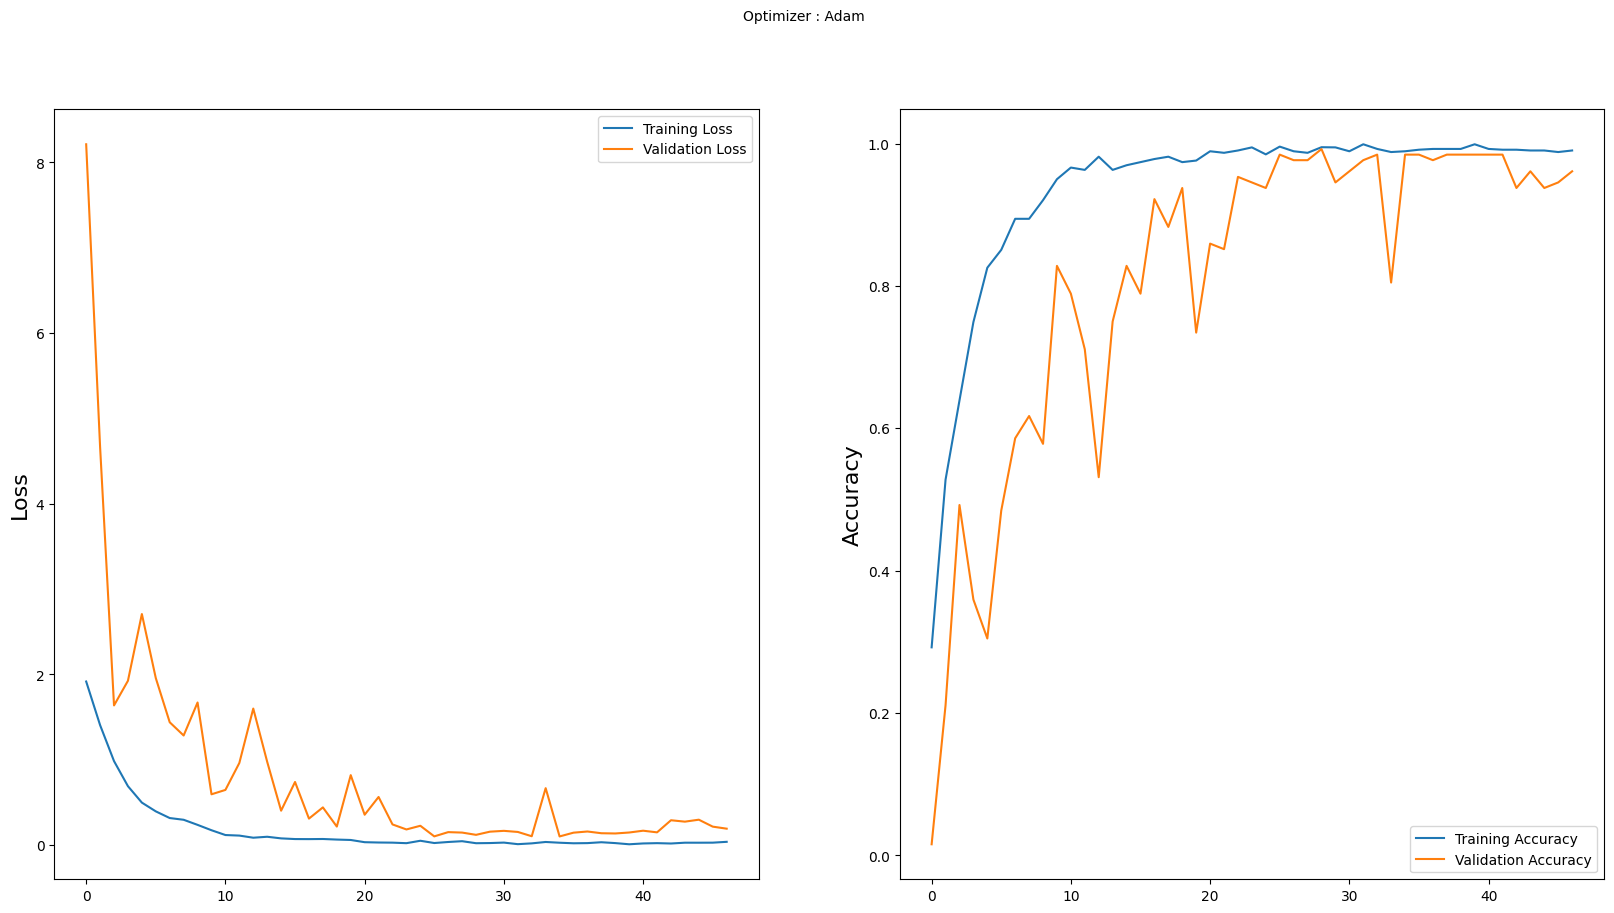

In [15]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [17]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [19]:
!cp CJJJ.h5 '/content/gdrive/My Drive/'
!ls -lt '/content/gdrive/My Drive/' 

total 1383526
-rw------- 1 root root  54541112 Dec  4 11:32  CJJJ.h5
-rw------- 1 root root  42677436 Dec  4 10:47  FERRR.zip
-rw------- 1 root root  54541112 Dec  4 10:35  newacc.h5
-rw------- 1 root root  41493480 Dec  4 09:52  acc.h5
-rw------- 1 root root  41805146 Dec  3 15:01  FERR.zip
-rw------- 1 root root 347978080 Nov 17 15:32  newmodel2.h5
-rw------- 1 root root  63252113 Nov 15 10:27 'archive (2).zip'
-rw------- 1 root root 678126638 Nov 15 09:56  CKPlus.zip
-rw------- 1 root root    190614 Nov  9 06:41 'Farooq Baig - Resume.pdf'
-rw------- 1 root root     23616 Oct 24 14:54  Untitled
-rw------- 1 root root    206780 Sep 11 04:19 'Farooq Baig -Resume (1).pdf'
-rw------- 1 root root  11526610 Aug 17 11:30  Neww_.pdf
-rw------- 1 root root  11368811 Aug 16 02:40  Neww.pdf
-rw------- 1 root root  11344013 Aug 13 14:11  Neww_w.pdf
-rw------- 1 root root  11204586 Aug  7 10:21  Newwww.pdf
-rw------- 1 root root     72720 Aug  6 15:24  5_6298835363699885793.xlsx
-rw------- 1 root